In [1]:
from cifar10 import data, vector_to_image, Classifier, Experiment

import numpy as np

import plotly.graph_objects as go
from tqdm.auto import tqdm, trange

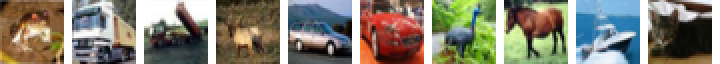

In [2]:
vector_to_image(*data["train"]["data"][:10])

In [3]:
classifier = Classifier()
classifier.loss(data["train"], regularization=0.01)

Tensor(data=2.385240174078981, backward=<function add.<locals>.<lambda> at 0x7f0eff007790>)

In [4]:
example_gradients = classifier.gradients(data["train"], regularization=0.01)
example_gradient_values = [
    value
    for gradient in [example_gradients[classifier.weights], example_gradients[classifier.biases]]
    for value in gradient.flatten()
]

go.Figure(
    layout=dict(
        title="Distribution of gradient values",
        xaxis_title="Gradient",
        yaxis_title="Number of values",
    ),
    data=go.Histogram(
        x=example_gradient_values
    ),
)

In [5]:
classifier.predictions(data["train"]["data"][:10])

array([2, 7, 7, 1, 3, 8, 5, 5, 9, 1])

In [6]:
classifier.accuracy(data["train"])

0.1181

In [7]:
Experiment.run(data=data, classifier=Classifier(), num_epochs=4).loss_plot # quick test

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

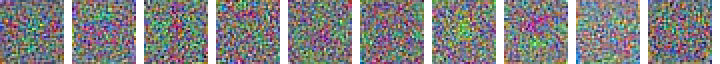

In [8]:
experiment = Experiment.run(
    data=data,
    classifier=Classifier(),
    regularization=0,
    num_epochs=40,
    num_per_batch=100,
    learning_rate=.1
)
experiment.templates

In [9]:
experiment.loss_plot

In [10]:
experiment.accuracy_plot

  0%|          | 0/40 [00:00<?, ?it/s]

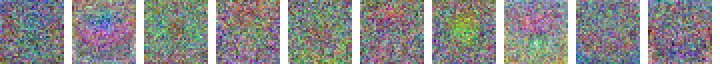

In [11]:
experiment = Experiment.run(
    data=data,
    classifier=Classifier(),
    regularization=0,
    num_epochs=40,
    num_per_batch=100,
    learning_rate=.001
)
experiment.templates

In [12]:
experiment.loss_plot

In [13]:
experiment.accuracy_plot

  0%|          | 0/40 [00:00<?, ?it/s]

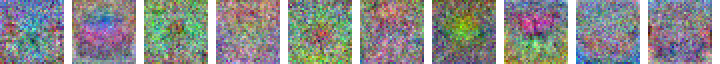

In [14]:
experiment = Experiment.run(
    data=data,
    classifier=Classifier(),
    regularization=.1,
    num_epochs=40,
    num_per_batch=100,
    learning_rate=.001
)
experiment.templates

In [15]:
experiment.loss_plot

In [16]:
experiment.accuracy_plot

  0%|          | 0/40 [00:00<?, ?it/s]

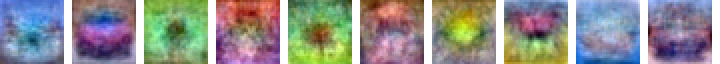

In [17]:
experiment = Experiment.run(
    data=data,
    classifier=Classifier(),
    regularization=1,
    num_epochs=40,
    num_per_batch=100,
    learning_rate=.001
)
experiment.templates

In [18]:
experiment.loss_plot

In [19]:
experiment.accuracy_plot